In [13]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from matplotlib import pyplot
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')


from numpy import asarray
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot

In [14]:
df = pd.read_csv("../Bitcoin Neerja/DataSets/Final Bitcoin/final_12_24.csv",parse_dates=True,index_col="Datetime")
df.columns = ['Negative','Neutral','Positive','Compound','Price']
df.head()

,Negative,Neutral,Positive,Compound,Price
Datetime,,,,,
2021-05-11 16:00:00,0.035168,0.893734,0.071097,0.085143,56214.549300
2021-05-11 16:30:00,0.028430,0.903952,0.067611,0.093597,56006.305340
2021-05-11 17:00:00,0.032138,0.898411,0.069451,0.089863,56170.172010
2021-05-11 17:30:00,0.026204,0.903829,0.069969,0.108181,56393.492579
2021-05-11 18:00:00,0.030692,0.900771,0.068541,0.088947,56458.498114


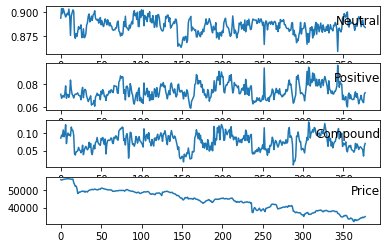

In [15]:
values = df.values
# specify columns to plot
groups = [1,2,3,4]
i = 1
# plot each column
plt.figure()
for group in groups:
    plt.subplot(len(groups), 1, i)
    plt.plot(values[:, group])
    plt.title(df.columns[group], y=0.5, loc='right')
    i += 1
plt.show()

In [ ]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [ ]:
# fit an random forest model and make a one step prediction
def random_forest_forecast(train, testX):
    # transform list into array
    train = asarray(train)
    # split into input and output columns
    trainX = train[:, :-1]
    trainy = train[:, -1]
    # fit model
    model = RandomForestRegressor(n_estimators=1000)
    model.fit(trainX, trainy)
    # make a one-step prediction
    yhat = model.predict([testX])
    return yhat[0]

In [6]:
# walk-forward validation for univariate data
def walk_forward_validation(data, n_test):
    predictions = list()
    # split dataset
    train, test = train_test_split(data, n_test)
    # seed history with training dataset
    history = [train[x] for x in train]

    # step over each time-step in the test set
    for i in range(len(test)):
        # split test row into input and output columns
        testX, testy = test.iloc[i, :-1], test.iloc[i, -1]
        # fit model on history and make a prediction
        yhat = random_forest_forecast(history, testX)
        # store forecast in list of predictions
        predictions.append(yhat)
        # add actual observation to history for the next loop
        history.append(test[i])
        # summarize progress
        print('>expected=%.1f, predicted=%.1f' % (testy, yhat))
    # estimate prediction error
    error = mean_absolute_error(test.iloc[:, -1], predictions)
    return error, test.iloc[:, 1], predictions

In [7]:
# split a univariate dataset into train/test sets
def train_test_split(data, n_test):
    return data.iloc[:-n_test, :], data.iloc[-n_test:, :]

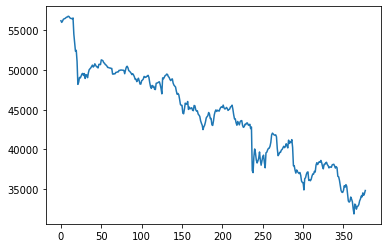

In [9]:
pyplot.plot(df['Price'].values)
pyplot.show()

In [10]:
data = series_to_supervised(df.values, n_in=1)

In [11]:
data.head()

,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var1(t),var2(t),var3(t),var4(t),var5(t)
1,0.035168,0.893734,0.071097,0.085143,56214.549300,0.028430,0.903952,0.067611,0.093597,56006.305340
2,0.028430,0.903952,0.067611,0.093597,56006.305340,0.032138,0.898411,0.069451,0.089863,56170.172010
3,0.032138,0.898411,0.069451,0.089863,56170.172010,0.026204,0.903829,0.069969,0.108181,56393.492579
4,0.026204,0.903829,0.069969,0.108181,56393.492579,0.030692,0.900771,0.068541,0.088947,56458.498114
5,0.030692,0.900771,0.068541,0.088947,56458.498114,0.030579,0.897858,0.071559,0.097518,56492.292057


In [12]:
# evaluate
mae, y, yhat = walk_forward_validation(data, 80)
print('MAE: %.3f' % mae)
# plot expected vs predicted
pyplot.plot(y, label='Expected')
pyplot.plot(yhat, label='Predicted')
pyplot.legend()
pyplot.show()

ValueError: X has 9 features, but DecisionTreeRegressor is expecting 296 features as input.

In [12]:
# scaler = MinMaxScaler(feature_range=(0, 1)) #scaling values from 0 to 1
# scaled = scaler.fit_transform(df.values)

n_hours = 3
n_features = 5              
n_obs = n_hours*n_features

reframed = series_to_supervised(scaled, n_hours, 1)  #t-3,t-2,t-1 values of all the columns. you can change n_hours for this
reframed.head()

,var1(t-3),var2(t-3),var3(t-3),var4(t-3),var5(t-3),var1(t-2),var2(t-2),var3(t-2),var4(t-2),var5(t-2),var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var1(t),var2(t),var3(t),var4(t),var5(t)
3,0.243738,0.776687,0.324230,0.622986,0.977262,0.060530,1.000000,0.231852,0.692742,0.968908,0.161340,0.878910,0.280621,0.661929,0.975482,0.000000,0.997303,0.294333,0.813083,0.984440
4,0.060530,1.000000,0.231852,0.692742,0.968908,0.161340,0.878910,0.280621,0.661929,0.975482,0.000000,0.997303,0.294333,0.813083,0.984440,0.122027,0.930469,0.256493,0.654375,0.987048
5,0.161340,0.878910,0.280621,0.661929,0.975482,0.000000,0.997303,0.294333,0.813083,0.984440,0.122027,0.930469,0.256493,0.654375,0.987048,0.118970,0.866817,0.336480,0.725095,0.988404
6,0.000000,0.997303,0.294333,0.813083,0.984440,0.122027,0.930469,0.256493,0.654375,0.987048,0.118970,0.866817,0.336480,0.725095,0.988404,0.011253,0.802668,0.519393,0.936092,0.992110
7,0.122027,0.930469,0.256493,0.654375,0.987048,0.118970,0.866817,0.336480,0.725095,0.988404,0.011253,0.802668,0.519393,0.936092,0.992110,0.242311,0.853687,0.232247,0.496788,0.995341
